In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
data = pd.read_csv('delivery_time.csv')

In [5]:
data.head(20)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [6]:
data.tail(10)

,Delivery Time,Sorting Time
11,10.75,4
12,16.68,7
13,11.50,3
14,12.03,3
15,14.88,4
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [7]:
data.shape

(21, 2)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [9]:
data[data.duplicated()].shape

(0, 2)

In [10]:
data.duplicated()#no duplicated values

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

In [11]:
data.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [12]:
data_clean1 = data.rename({'Delivery Time':'Delivery_Time'},axis = 1)

In [13]:
data_clean1 = data_clean1.rename({'Sorting Time':'Sorting_Time'},axis = 1)

In [14]:
data_clean1.columns

Index(['Delivery_Time', 'Sorting_Time'], dtype='object')

In [15]:
data_clean1.isnull().sum()#no null values found

Delivery_Time    0
Sorting_Time     0
dtype: int64

In [16]:
##Scaling the data

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
data_clean1.values

array([[21.  , 10.  ],
       [13.5 ,  4.  ],
       [19.75,  6.  ],
       [24.  ,  9.  ],
       [29.  , 10.  ],
       [15.35,  6.  ],
       [19.  ,  7.  ],
       [ 9.5 ,  3.  ],
       [17.9 , 10.  ],
       [18.75,  9.  ],
       [19.83,  8.  ],
       [10.75,  4.  ],
       [16.68,  7.  ],
       [11.5 ,  3.  ],
       [12.03,  3.  ],
       [14.88,  4.  ],
       [13.75,  6.  ],
       [18.11,  7.  ],
       [ 8.  ,  2.  ],
       [17.83,  7.  ],
       [21.5 ,  5.  ]])

In [19]:
array = data_clean1.values
scaler = MinMaxScaler(feature_range = (0,1))
rescaledX = scaler.fit_transform(array)

In [20]:
rescaledX = np.array(rescaledX)

In [21]:
data_clean1_scaled = pd.DataFrame(rescaledX,columns = data_clean1.columns)

<Axes: xlabel='Delivery_Time', ylabel='Sorting_Time'>

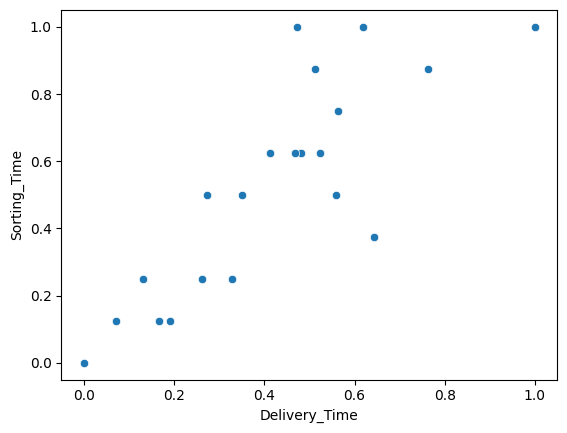

In [22]:
sns.scatterplot(x = data_clean1_scaled['Delivery_Time'],y = data_clean1_scaled['Sorting_Time'])

In [23]:
data_clean1_scaled.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [24]:
##fitting a model

In [25]:
import statsmodels.formula.api as smf

In [26]:
model = smf.ols('Delivery_Time~Sorting_Time',data = data_clean1_scaled).fit()

<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

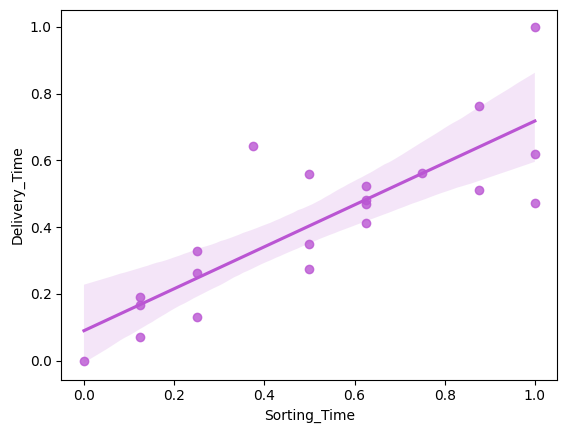

In [27]:
sns.regplot(x = 'Sorting_Time',y = 'Delivery_Time',data = data_clean1_scaled,color = '#ba55d3')

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           3.98e-06
Time:                        04:16:11   Log-Likelihood:                 12.578
No. Observations:                  21   AIC:                            -21.16
Df Residuals:                      19   BIC:                            -19.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0896      0.060      1.496      0.151      -0.036       0.215
Sorting_Time     0.6282      0.098      6.387      0.000       0.422       0.834
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         4.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
##prediction

In [30]:
value = pd.array([4,10,25,6,12],np.float64)
pred_df = pd.DataFrame(value,columns = ['Sorting_Time'])

In [31]:
pred_df

,Sorting_Time
0,4.0
1,10.0
2,25.0
3,6.0
4,12.0


In [32]:
model.predict(pred_df)

0     2.602353
1     6.371541
2    15.794512
3     3.858749
4     7.627937
dtype: float64

In [33]:
mse = model.mse_resid

In [34]:
root_mse = np.sqrt(mse)

In [35]:
print("root mean squared error is ",root_mse)

root mean squared error is  0.13975732232810184


In [36]:
model.predict()

array([0.71775871, 0.24661017, 0.40365968, 0.63923395, 0.71775871,
       0.40365968, 0.48218444, 0.16808541, 0.71775871, 0.63923395,
       0.5607092 , 0.24661017, 0.48218444, 0.16808541, 0.16808541,
       0.24661017, 0.40365968, 0.48218444, 0.08956066, 0.48218444,
       0.32513493])

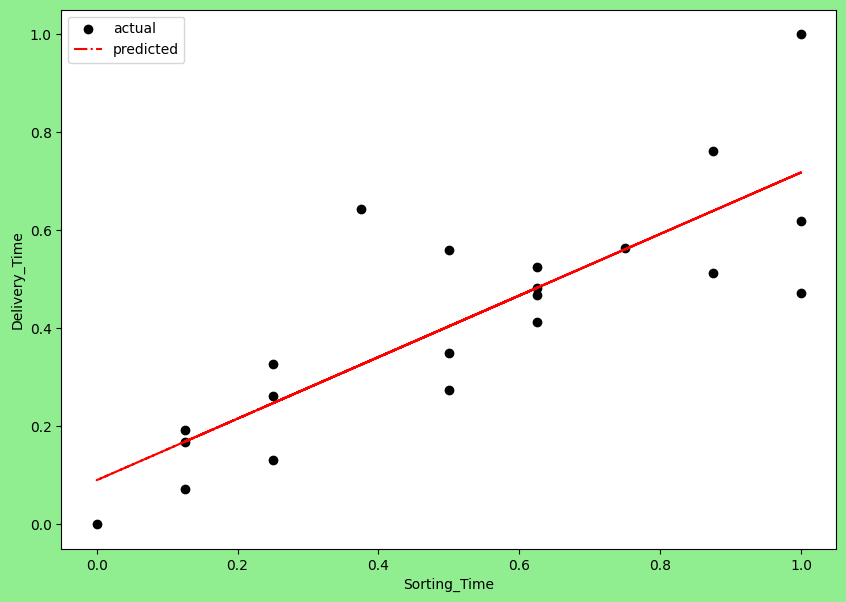

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7),facecolor = "lightgreen")
plt.scatter(data_clean1_scaled['Sorting_Time'],data_clean1_scaled['Delivery_Time'],color = 'black',label = 'actual')
plt.plot(data_clean1_scaled['Sorting_Time'],model.predict(),label = 'predicted',color = 'red',linestyle = '-.')
plt.xlabel('Sorting_Time')
plt.ylabel('Delivery_Time')
plt.legend(loc = 'best')
plt.show()

In [38]:
model2 = smf.ols('Delivery_Time~np.log(Sorting_Time)',data = data_clean1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           2.64e-06
Time:                        04:16:12   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
model2.params

Intercept               1.159684
np.log(Sorting_Time)    9.043413
dtype: float64

In [40]:
model2.resid

0    -0.982913
1    -0.196517
2     2.386695
3     2.969906
4     7.017087
5    -2.013305
6     0.242646
7    -1.594889
8    -4.082913
9    -2.280094
10   -0.134933
11   -2.946517
12   -2.077354
13    0.405111
14    0.935111
15    1.183483
16   -3.613305
17   -0.647354
18    0.571900
19   -0.927354
20    5.785504
dtype: float64

In [41]:
model2.predict()

array([21.98291253, 13.69651659, 17.36330521, 21.03009382, 21.98291253,
       17.36330521, 18.75735354, 11.09488867, 21.98291253, 21.03009382,
       19.96493314, 13.69651659, 18.75735354, 11.09488867, 11.09488867,
       13.69651659, 17.36330521, 18.75735354,  7.42810005, 18.75735354,
       15.71449599])

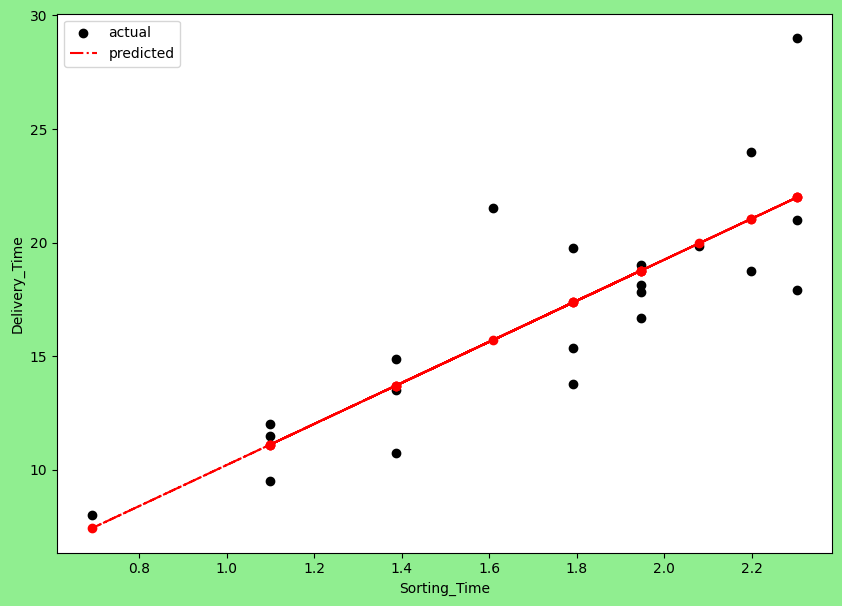

In [42]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(np.log(data_clean1['Sorting_Time']),data_clean1['Delivery_Time'],color="black",label="actual")
plt.plot(np.log(data_clean1['Sorting_Time']),model2.predict(),label="predicted",color="red",linestyle="-.")
plt.scatter(np.log(data_clean1['Sorting_Time']),model2.predict(),color="red")
plt.xlabel('Sorting_Time')
plt.ylabel('Delivery_Time')
plt.legend(loc = 'best')
plt.show()

In [43]:
model3 = smf.ols('np.log(Delivery_Time)~Sorting_Time',data = data_clean1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Thu, 22 Jun 2023   Prob (F-statistic):           1.59e-06
Time:                           04:16:12   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
model3.params

Intercept       2.121372
Sorting_Time    0.105552
dtype: float64

In [45]:
model3.resid

0    -0.132365
1     0.059111
2     0.228472
3     0.106718
4     0.190408
5    -0.023566
6     0.084206
7    -0.186735
8    -0.292087
9    -0.140142
10    0.021411
11   -0.168672
12   -0.046023
13    0.004320
14    0.049377
15    0.156440
16   -0.133643
17    0.036231
18   -0.253034
19    0.020649
20    0.418923
dtype: float64

In [46]:
model3.predict()

array([3.17688783, 2.54357825, 2.75468144, 3.07133624, 3.17688783,
       2.75468144, 2.86023304, 2.43802665, 3.17688783, 3.07133624,
       2.96578464, 2.54357825, 2.86023304, 2.43802665, 2.43802665,
       2.54357825, 2.75468144, 2.86023304, 2.33247505, 2.86023304,
       2.64912984])

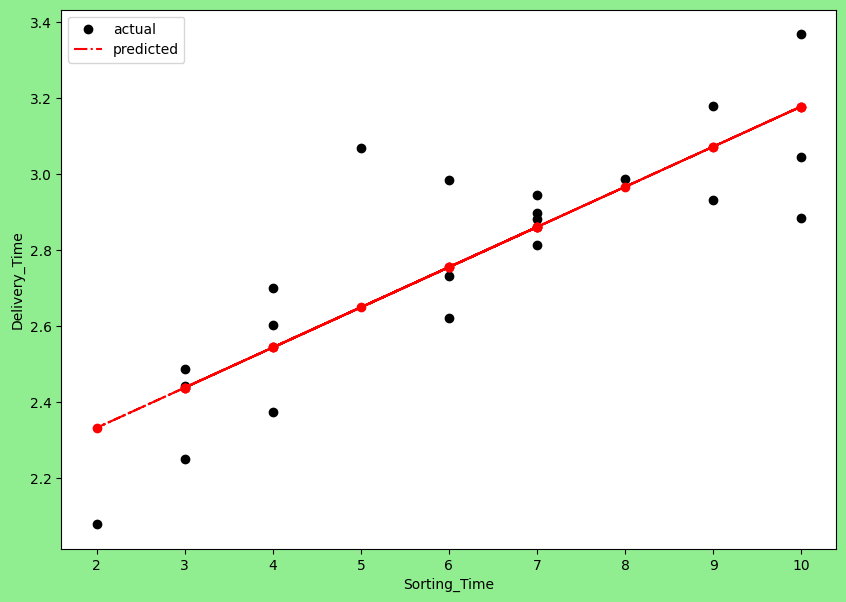

In [47]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(data_clean1['Sorting_Time'],np.log(data_clean1['Delivery_Time']),color="black",label="actual")
plt.plot(data_clean1['Sorting_Time'],model3.predict(),label="predicted",color="red",linestyle="-.")
plt.scatter(data_clean1['Sorting_Time'],model3.predict(),color="red")
plt.xlabel('Sorting_Time')
plt.ylabel('Delivery_Time')
plt.legend(loc = 'best')
plt.show()

In [48]:
data_clean1["Sorting_Time_2"] = data_clean1['Sorting_Time'] ** 2
model_quad = smf.ols("np.log(Delivery_Time)~Sorting_Time+Sorting_Time_2",data = data_clean1).fit()
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Thu, 22 Jun 2023   Prob (F-statistic):           2.20e-06
Time:                           04:16:13   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.6997      0.228      7.441      0.000       1.220       2.180
Sorting_Time       0.2659      0.080      3.315      0.004       0.097       0.434
Sorting_Time_2    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
model_quad.params

Intercept         1.699704
Sorting_Time      0.265922
Sorting_Time_2   -0.012841
dtype: float64

In [50]:
model_quad.resid

0    -0.030341
1     0.044747
2     0.150179
3     0.125141
4     0.292433
5    -0.101859
6     0.012471
7    -0.130613
8    -0.190063
9    -0.121719
10   -0.018085
11   -0.183037
12   -0.117758
13    0.060442
14    0.105499
15    0.142076
16   -0.211935
17   -0.035504
18   -0.100744
19   -0.051086
20    0.359754
dtype: float64

In [51]:
model_quad.predict()

array([3.07486324, 2.55794231, 2.8329741 , 3.05291276, 3.07486324,
       2.8329741 , 2.9319682 , 2.38190461, 3.07486324, 3.05291276,
       3.00528108, 2.55794231, 2.9319682 , 2.38190461, 2.38190461,
       2.55794231, 2.8329741 , 2.9319682 , 2.1801857 , 2.9319682 ,
       2.70829881])

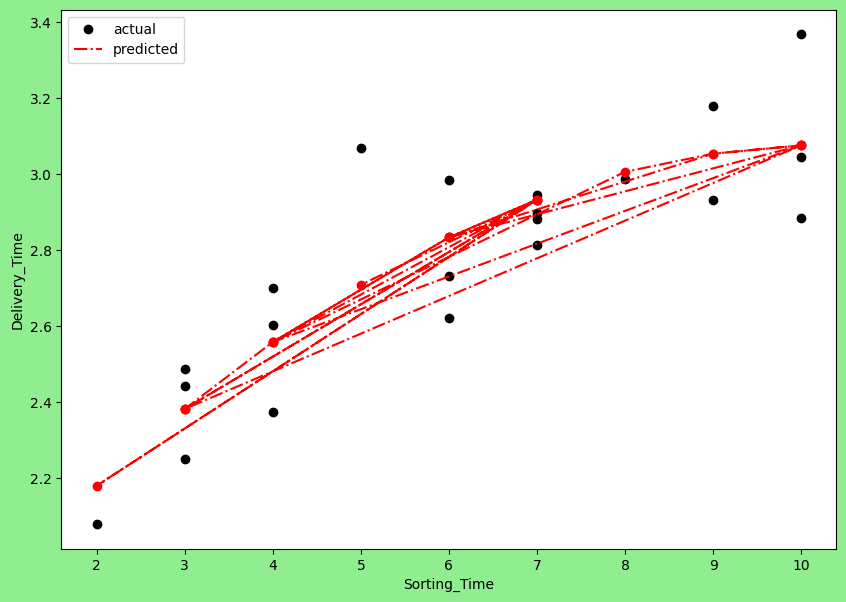

In [52]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(data_clean1['Sorting_Time'],np.log(data_clean1['Delivery_Time']),color="black",label="actual")
plt.plot(data_clean1['Sorting_Time'],model_quad.predict(),label="predicted",color="red",linestyle="-.")
plt.scatter(data_clean1['Sorting_Time'],model_quad.predict(),color="red")
plt.xlabel('Sorting_Time')
plt.ylabel('Delivery_Time')
plt.legend(loc = 'best')
plt.show()

In [54]:
data_sqrt = np.sqrt(data_clean1['Delivery_Time'])
model_sqrt = smf.ols("data_sqrt~Sorting_Time",data = data_clean1).fit()
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              data_sqrt   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     45.20
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           2.00e-06
Time:                        04:16:31   Log-Likelihood:                -6.6646
No. Observations:                  21   AIC:                             17.33
Df Residuals:                      19   BIC:                             19.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.7727      0.205     13.527      0.000       2.344       3.202
Sorting_Time     0.2066      0.031      6.723      0.000       0.142       0.271
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.195
Skew:                           0.580   Prob(JB):                        0.550
Kurtosis:                       3.142   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
model_sqrt.params

Intercept       2.772731
Sorting_Time    0.206632
dtype: float64

In [56]:
model_sqrt.resid

0    -0.256474
1     0.074976
2     0.431575
3     0.266562
4     0.546116
5    -0.094614
6     0.139745
7    -0.310419
8    -0.608210
9    -0.302290
10    0.027303
11   -0.320539
12   -0.135038
13   -0.001462
14    0.075803
15    0.258202
16   -0.304423
17    0.036431
18   -0.357568
19    0.003405
20    0.830919
dtype: float64

In [57]:
model_sqrt.predict()

array([4.83904922, 3.59925831, 4.01252195, 4.6324174 , 4.83904922,
       4.01252195, 4.21915377, 3.39262649, 4.83904922, 4.6324174 ,
       4.42578558, 3.59925831, 4.21915377, 3.39262649, 3.39262649,
       3.59925831, 4.01252195, 4.21915377, 3.18599468, 4.21915377,
       3.80589013])

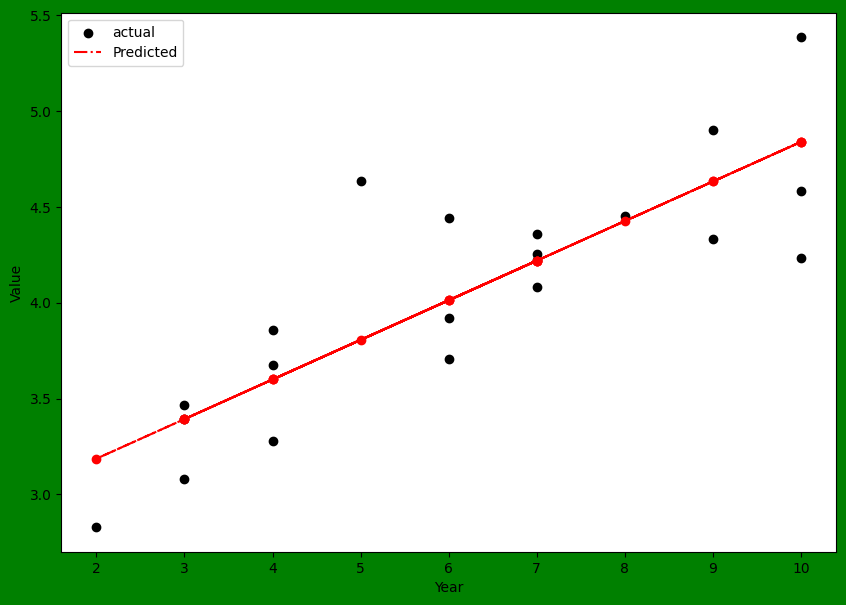

In [58]:
plt.figure(figsize=(10,7),facecolor="green")
plt.scatter(data_clean1['Sorting_Time'],data_sqrt,color="black",label="actual")
plt.plot(data_clean1['Sorting_Time'],model_sqrt.predict(),label="Predicted",color="red",linestyle="-.")
plt.scatter(data_clean1['Sorting_Time'],model_sqrt.predict(),color="red")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(loc="best")
plt.show()

In [59]:
data_cube = np.cbrt(data_clean1['Delivery_Time'])
model_cbrt = smf.ols("data_cube~Sorting_Time",data = data_clean1).fit()
model_cbrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              data_cube   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     46.08
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           1.75e-06
Time:                        04:19:57   Log-Likelihood:                 11.651
No. Observations:                  21   AIC:                            -19.30
Df Residuals:                      19   BIC:                            -17.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.9951      0.086     23.283      0.000       1.816       2.174
Sorting_Time     0.0872      0.013      6.788      0.000       0.060       0.114
==============================================================================
Omnibus:                        1.873   Durbin-Watson:                   1.274
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                0.966
Skew:                           0.523   Prob(JB):                        0.617
Kurtosis:                       3.106   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
model_cbrt.params

Intercept       1.995120
Sorting_Time    0.087217
dtype: float64

In [61]:
model_cbrt.resid

0    -0.108369
1     0.037113
2     0.184636
3     0.104424
4     0.205024
5    -0.033177
6     0.062761
7    -0.138860
8    -0.251414
9    -0.123429
10    0.013847
11   -0.136987
12   -0.050595
13    0.000407
14    0.034563
15    0.115629
16   -0.122714
17    0.020428
18   -0.169554
19    0.006824
20    0.349443
dtype: float64

In [62]:
model_cbrt.predict()

array([2.86729268, 2.34398904, 2.51842359, 2.78007541, 2.86729268,
       2.51842359, 2.60564086, 2.25677177, 2.86729268, 2.78007541,
       2.69285813, 2.34398904, 2.60564086, 2.25677177, 2.25677177,
       2.34398904, 2.51842359, 2.60564086, 2.1695545 , 2.60564086,
       2.43120632])

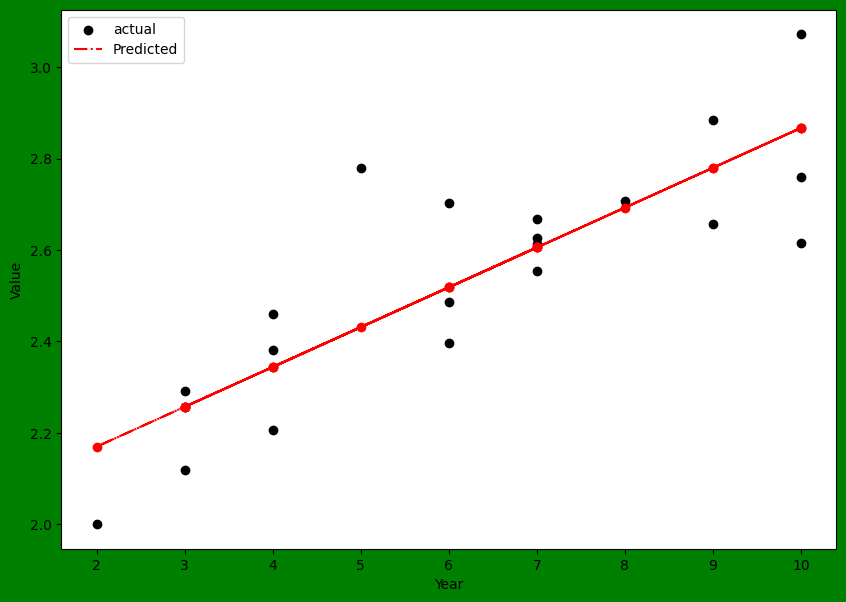

In [63]:
plt.figure(figsize=(10,7),facecolor="green")
plt.scatter(data_clean1['Sorting_Time'],data_cube,color="black",label="actual")
plt.plot(data_clean1['Sorting_Time'],model_cbrt.predict(),label="Predicted",color="red",linestyle="-.")
plt.scatter(data_clean1['Sorting_Time'],model_cbrt.predict(),color="red")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(loc="best")
plt.show()

**Best Model**

In [64]:
data_clean1["Sorting_Time_2"] = data_clean1['Sorting_Time'] ** 2
model_quad = smf.ols("np.log(Delivery_Time)~Sorting_Time+Sorting_Time_2",data = data_clean1).fit()
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Thu, 22 Jun 2023   Prob (F-statistic):           2.20e-06
Time:                           04:23:52   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.6997      0.228      7.441      0.000       1.220       2.180
Sorting_Time       0.2659      0.080      3.315      0.004       0.097       0.434
Sorting_Time_2    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
model_quad.params

Intercept         1.699704
Sorting_Time      0.265922
Sorting_Time_2   -0.012841
dtype: float64

In [66]:
model_quad.resid

0    -0.030341
1     0.044747
2     0.150179
3     0.125141
4     0.292433
5    -0.101859
6     0.012471
7    -0.130613
8    -0.190063
9    -0.121719
10   -0.018085
11   -0.183037
12   -0.117758
13    0.060442
14    0.105499
15    0.142076
16   -0.211935
17   -0.035504
18   -0.100744
19   -0.051086
20    0.359754
dtype: float64